<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Oct_27_28/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
x = np.linspace(0, 4*np.pi, 200)


In [61]:
a = np.linspace(1, 10, 200)

In [ ]:
y = 3*np.sin(5*x)

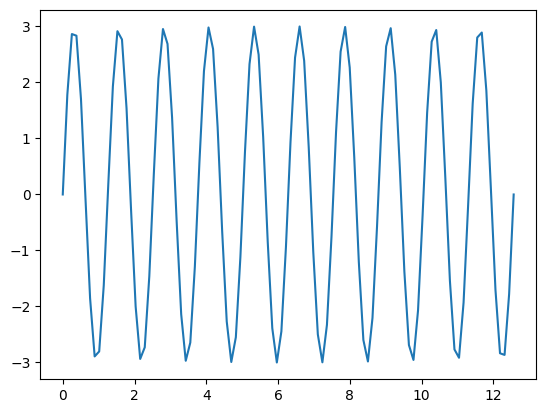

In [ ]:
plt.plot(x,y)

In [62]:
f = np.zeros_like(a)
for i in range(200):
  y = a[i]*np.sin(x+i)
  f[i] = y[i]
  #plt.plot(x,y)

In [63]:
f.shape

(200,)

In [64]:
f

array([ 0.        ,  0.91341259,  0.9264891 , -0.05432161, -1.058258  ,
       -1.00964505,  0.12148351,  1.20644074,  1.08312511, -0.20128743,
       -1.35705863, -1.14625828,  0.29347655,  1.50919203,  1.19841526,
       -0.39773632, -1.66190727, -1.23901099,  0.51369539,  1.81426006,
        1.26750707, -0.64092675, -1.96529911, -1.28341399,  0.77894908,
        2.11406961,  1.28629324, -0.92722831, -2.25961684, -1.27575925,
        1.08517933,  2.40098977,  1.25148109, -1.25216788, -2.53724463,
       -1.21318409,  1.42751264,  2.6674485 ,  1.16065121, -1.61048748,
       -2.79068287, -1.09372421,  1.80032383,  2.90604716,  1.01230468,
       -1.9962133 , -3.0126622 , -0.91635483,  2.19731031,  3.10967365,
        0.8058981 , -2.40273503, -3.19625535, -0.68101954,  2.61157624,
        3.2716126 ,  0.54186599, -2.82289454, -3.33498532, -0.38864611,
        3.03572548,  3.38565117,  0.22163008, -3.24908288, -3.42292853,
       -0.04114925,  3.46196227,  3.44617929, -0.15240457, -3.67

In [65]:
f_prom = sum(f)/len(f)
f_prom

0.0020634603930112494

In [66]:
f = f-f_prom
f

array([-2.06346039e-03,  9.11349127e-01,  9.24425636e-01, -5.63850722e-02,
       -1.06032146e+00, -1.01170851e+00,  1.19420054e-01,  1.20437728e+00,
        1.08106165e+00, -2.03350887e-01, -1.35912209e+00, -1.14832174e+00,
        2.91413089e-01,  1.50712857e+00,  1.19635180e+00, -3.99799785e-01,
       -1.66397073e+00, -1.24107445e+00,  5.11631933e-01,  1.81219660e+00,
        1.26544361e+00, -6.42990208e-01, -1.96736257e+00, -1.28547745e+00,
        7.76885616e-01,  2.11200615e+00,  1.28422978e+00, -9.29291770e-01,
       -2.26168031e+00, -1.27782271e+00,  1.08311587e+00,  2.39892631e+00,
        1.24941763e+00, -1.25423134e+00, -2.53930809e+00, -1.21524755e+00,
        1.42544918e+00,  2.66538504e+00,  1.15858775e+00, -1.61255094e+00,
       -2.79274633e+00, -1.09578767e+00,  1.79826037e+00,  2.90398370e+00,
        1.01024122e+00, -1.99827676e+00, -3.01472566e+00, -9.18418293e-01,
        2.19524685e+00,  3.10761019e+00,  8.03834644e-01, -2.40479849e+00,
       -3.19831882e+00, -

In [51]:
#!git clone https://github.com/sbailey/empca.git

fatal: destination path 'empca' already exists and is not an empty directory.


In [52]:
from sklearn.decomposition import PCA
from empca import empca

In [80]:
np.random.seed(1)
nobs = 100
nvar = 200
nvec = 3
data = np.zeros(shape=(nobs, nvar))
x = np.linspace(0, 2*np.pi, nvar)
for i in range(nobs):
  for k in range(nvec):
    c = np.random.normal()
    data[1] += 5.0*nvec//(k+1)**2 *c *np.sin(x*(k+1))

In [81]:
#Agregamos ruido
sigma = np.ones(shape = data.shape)
for i in range(nobs//10):
  sigma[1] *= 5
  sigma[i, 0:nvar//4] *= 5

weights = 1 / sigma**2
noisy_data = data + np.random.normal(scale=sigma)
ndatas = np.average(noisy_data, weights=weights, axis = 0)
noisy_data2 = noisy_data - ndatas

In [85]:
print('testing empca')
m0 = empca.empca(noisy_data2, weights, niter = 20)

print('testing classic PCA')
m2 = empca.classic_pca(noisy_data2)
print('R2', m2.R2())

testing empca
       iter        R2             rchi2
EMPCA  1/20       0.01964118      1.01089700
EMPCA  2/20       0.02333885      0.96801501
EMPCA  3/20       0.02173569      0.95257250
EMPCA  4/20       0.02487729      0.94497878
EMPCA  5/20       0.03193511      0.94084393
EMPCA  6/20       0.04050054      0.93828611
EMPCA  7/20       0.04869428      0.93657469
EMPCA  8/20       0.05560836      0.93538292
EMPCA  9/20       0.06096688      0.93454124
EMPCA 10/20       0.06481219      0.93394749
EMPCA 11/20       0.06733247      0.93353151
EMPCA 12/20       0.06876922      0.93324176


/content/empca/empca.py:256: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


EMPCA 13/20       0.06936410      0.93304017
EMPCA 14/20       0.06933073      0.93289931
EMPCA 15/20       0.06884417      0.93279989
EMPCA 16/20       0.06804116      0.93272865
EMPCA 17/20       0.06702549      0.93267659
EMPCA 18/20       0.06587453      0.93263761
EMPCA 19/20       0.06464536      0.93260761
EMPCA 20/20       0.06337978      0.93258385
R2: 0.06286603836409876
testing classic PCA
R2 1.0


In [83]:
def build_continuums(meanspec, coeff, eigvec, n_vec = 5):
  conti_mock = []
  for i in range(len(coeff)):
    spectram = []
    for j in range(n_vec):
      spectram.append(coeff[i][j]*eigvec[j])
    spectrasm = np.vstack(spectram)
    specm = np.sum(spectrasm, axis = 0)
    conti_mock += [specm]
  continuum_mock = np.vstack(conti_mock)

  for i in range(len(continuum_mock)):
    continuum_mock[i] += meanspec
  return continuum_mock

In [87]:
contempca = build_continuums(ndatas, m0.coeff, m0.eigvec)

In [89]:
contpca = build_continuums(ndatas, m2.coeff, m2.eigvec)